In [1]:
import pandas
import seaborn as sns
from itertools import product
from typing import List

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)
sns.set_palette("colorblind")


def allocs(uppers: List[str], lowers: List[str]) -> List[str]:
    return [u + l for (u, l) in product(uppers, lowers)]



# Bulk

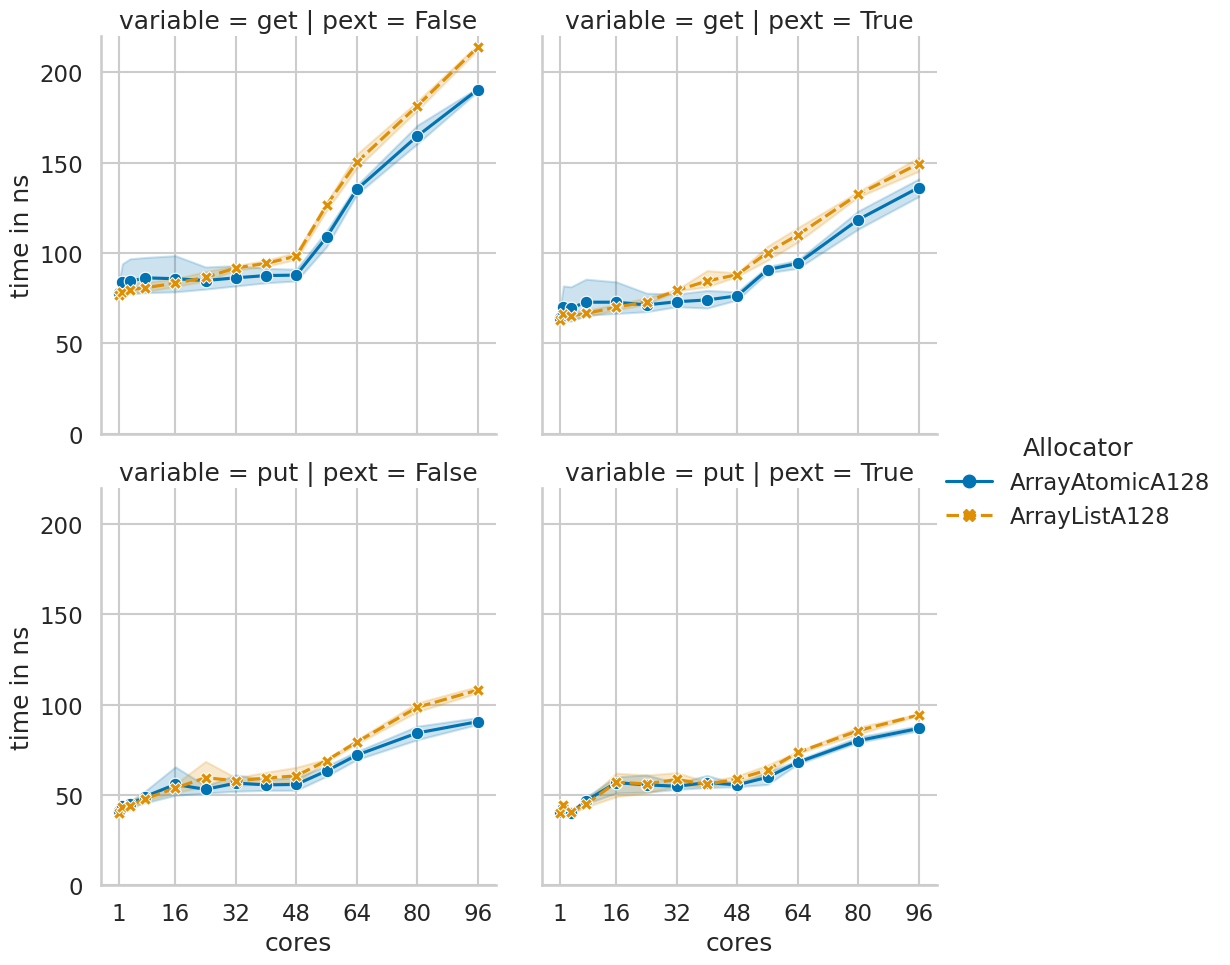

In [14]:
pgd0 = pandas.read_csv(f"out2/bulk_v.csv")
pgd0["pext"] = False
pgd1 = pandas.read_csv(f"out2_pext/bulk_v.csv")
pgd1["pext"] = True
pgd = pandas.concat([pgd0, pgd1], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put", "pext"]].melt(
    id_vars=["cores", "alloc", "pext"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable"]).min()
order = allocs(["ArrayAtomic", "ArrayList"], ["A128"])
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="pext", row="variable", style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 220))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
# g.set_titles("{col_name}")


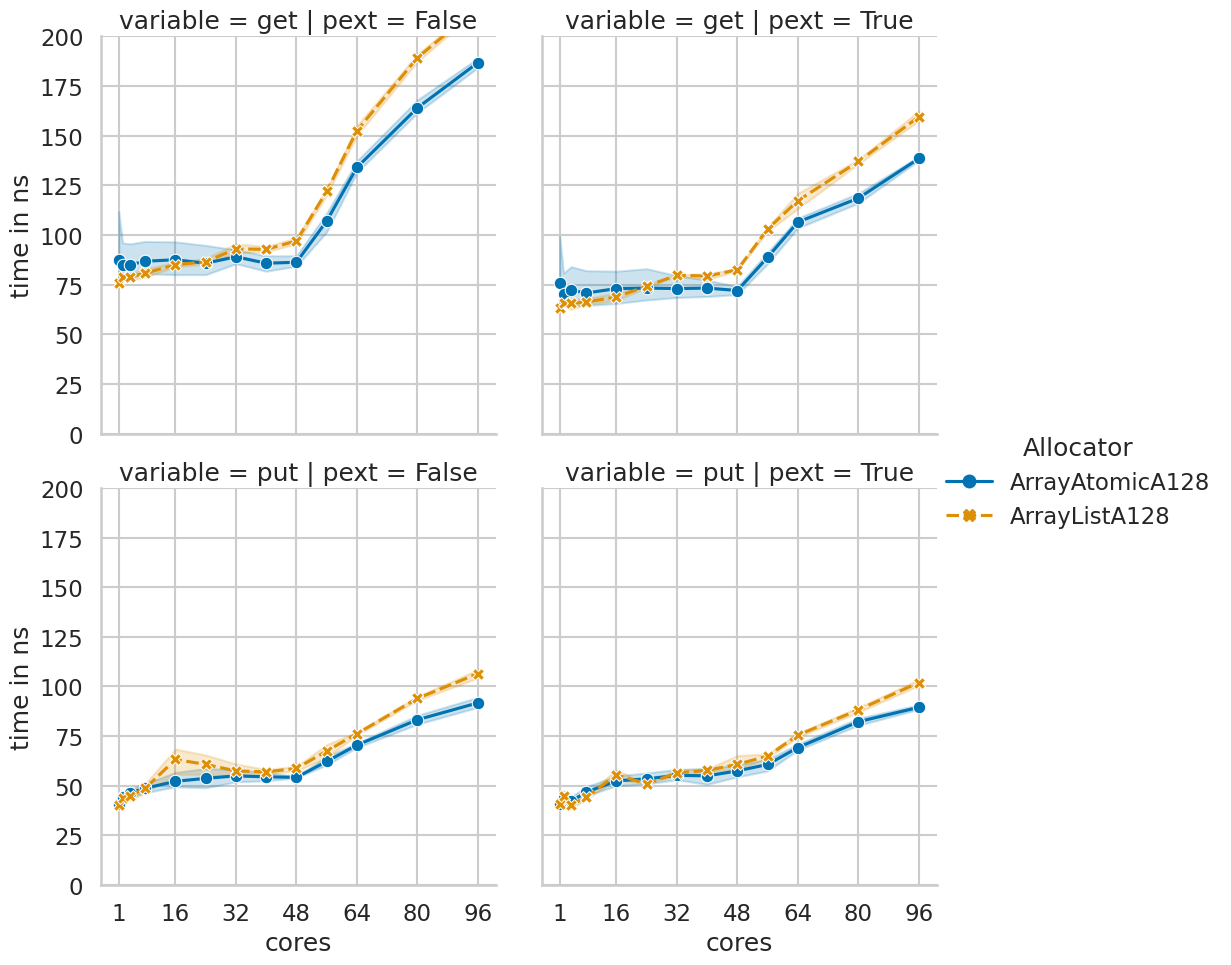

In [15]:
pgd0 = pandas.read_csv(f"out2/bulk_p.csv")
pgd0["pext"] = False
pgd1 = pandas.read_csv(f"out2_pext/bulk_p.csv")
pgd1["pext"] = True
pgd = pandas.concat([pgd0, pgd1], ignore_index=True)
pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "alloc", "get", "put", "pext"]].melt(
    id_vars=["cores", "alloc", "pext"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "alloc", "variable", "mem"]).min()
order = allocs(["ArrayAtomic", "ArrayList"], ["A128"])
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="pext", row="variable", style="alloc", hue="alloc", markers=True,
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 200))
g.legend.set_title("Allocator")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
# g.set_titles("{col_name}")


# Repeat

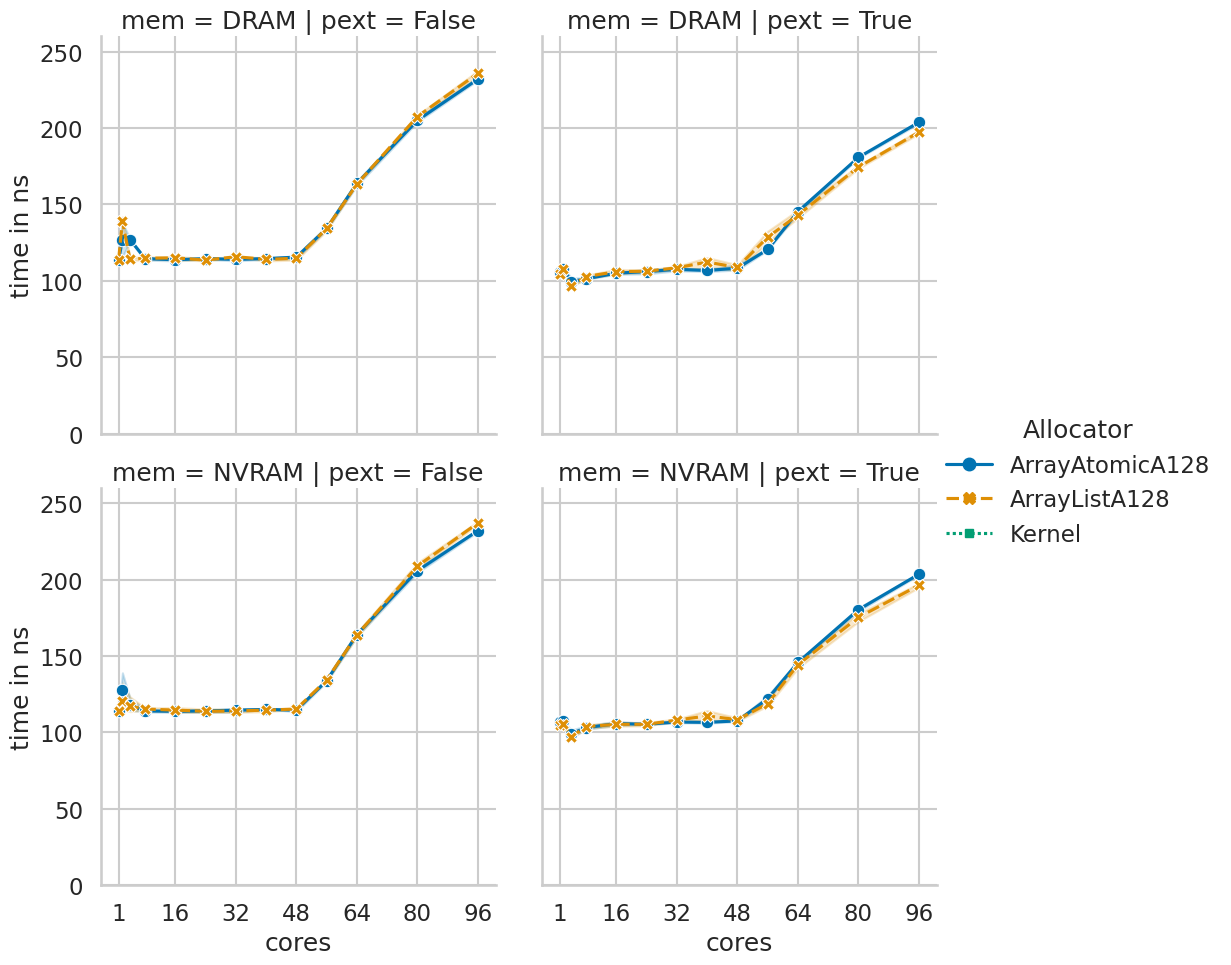

In [16]:
pgd0 = pandas.read_csv(f"out2/repeat_v.csv")
pgd0["pext"] = False
pgd1 = pandas.read_csv(f"out2_pext/repeat_v.csv")
pgd1["pext"] = True

vd = pandas.concat([
    pgd0, pgd1,
    pandas.read_csv("keep/remote/kernel_repeat.csv")
], ignore_index=True)
vd["mem"] = "DRAM"

pgd0 = pandas.read_csv(f"out2/repeat_p.csv")
pgd0["pext"] = False
pgd1 = pandas.read_csv(f"out2_pext/repeat_p.csv")
pgd1["pext"] = True
pd = pandas.concat([pgd0, pgd1], ignore_index=True)
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]
# pgd = pgd.groupby(["cores", "alloc", "mem"]).min()

order = allocs(["ArrayAtomic", "ArrayList"], ["A128"]) + ["Kernel"]
g = sns.relplot(data=pgd, x="cores", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True, col="pext", row="mem",
                style_order=order, hue_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 260))
g.legend.set_title("Allocator")
# g.set_titles("{col_name}")
g.set(xlabel="cores")
g.set(ylabel="time in ns")


# Random

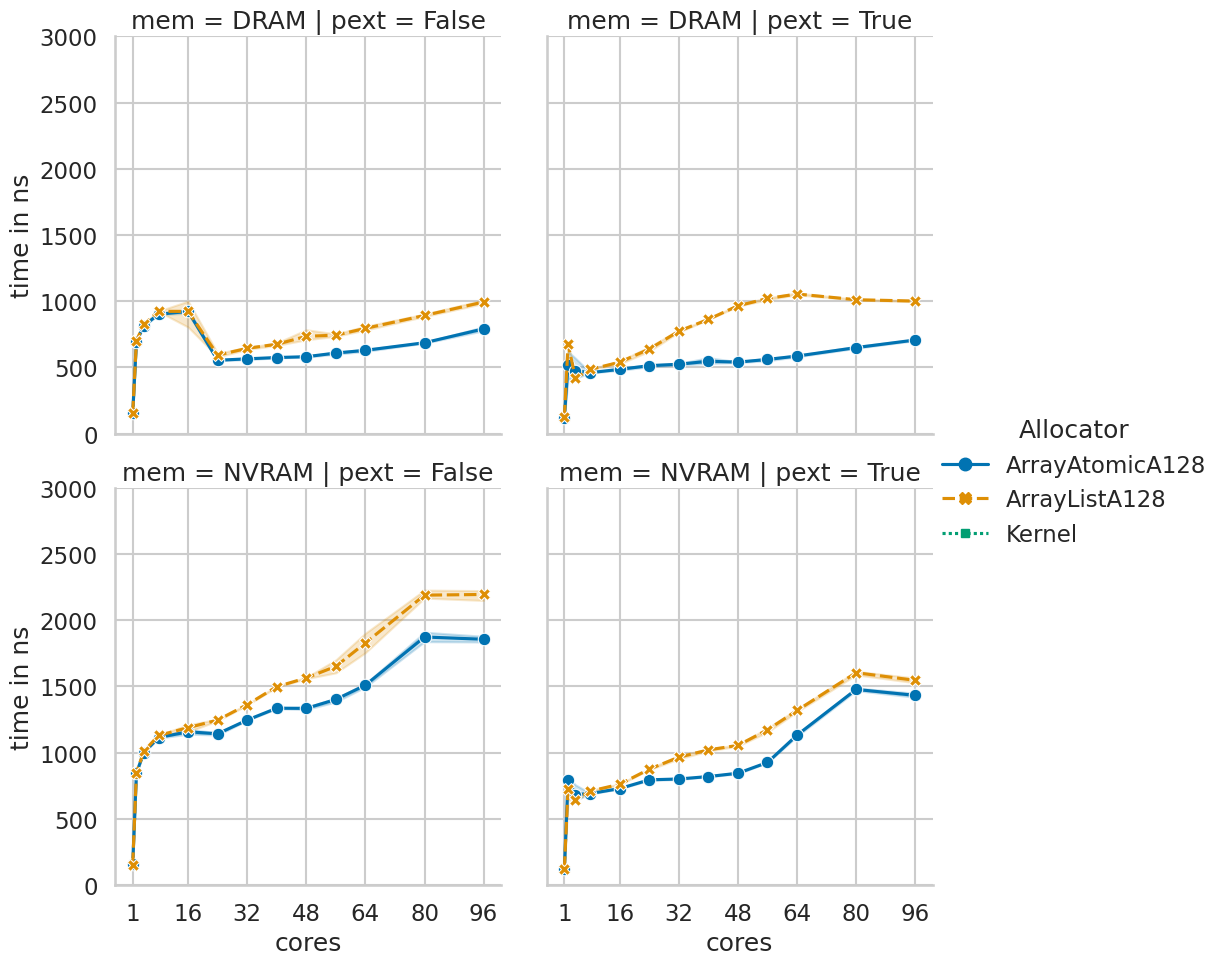

In [17]:
pgd0 = pandas.read_csv(f"out2/rand_v.csv")
pgd0["pext"] = False
pgd1 = pandas.read_csv(f"out2_pext/rand_v.csv")
pgd1["pext"] = True

vd = pandas.concat([
    pgd0, pgd1,
    pandas.read_csv("keep/remote/kernel_rand.csv")
], ignore_index=True)
vd["mem"] = "DRAM"

pgd0 = pandas.read_csv(f"out2/rand_p.csv")
pgd0["pext"] = False
pgd1 = pandas.read_csv(f"out2_pext/rand_p.csv")
pgd1["pext"] = True
pd = pandas.concat([pgd0, pgd1], ignore_index=True)
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

order = allocs(["ArrayAtomic", "ArrayList"], ["A128"]) + ["Kernel"]
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True, col="pext", row="mem",
                style_order=order, hue_order=order)

g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 3000))
# g.set(xlim=(1, 17))
g.legend.set_title("Allocator")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
# g.set_titles("{col_name}")
